# Predicting the Churn Probability of Customers Given the Historical Behaviour in Telco Company 

## Business Understanding

### Business Problem
How to reduce the churn rate in the Telco company by predicting customers' churn probability?

### Objective
Bulid a classification model to predict the churn probability

## Data Cleansing

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('telco_customer.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Change Data Types

In [4]:
df = df[~(df['TotalCharges'] == ' ')]

In [5]:
df['TotalCharges'] = df['TotalCharges'].astype('float64')

D:\R_temp\ipykernel_12884\392149425.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalCharges'] = df['TotalCharges'].astype('float64')


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

### Check Missing Values

In [7]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Check Outliers

In [8]:
df_num = df.select_dtypes(['int64', 'float64'])
col_num = df_num.columns
col_num

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [9]:
for col in col_num:
    print(f"Running for {col}")
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)

    iqr = q3 - q1
    print(f"IQR: {iqr}")

    fence_low = q1 - iqr*1.5
    fence_high = q3 + iqr*1.5

    outliers = df[(df[col] < fence_low) | (df[col] > fence_high)]
    print(f"Outliers: {outliers.shape}\n")

Running for SeniorCitizen
IQR: 0.0
Outliers: (1142, 21)

Running for tenure
IQR: 46.0
Outliers: (0, 21)

Running for MonthlyCharges
IQR: 54.275
Outliers: (0, 21)

Running for TotalCharges
IQR: 3393.2875000000004
Outliers: (0, 21)



In [10]:
df['SeniorCitizen'].nunique()

2

In [11]:
df_clean = df.copy()

## EDA

In [12]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

### Univariate Analysis

In [13]:
df_num = df_clean.select_dtypes(['int64','float64'])
col_num = df_num.columns
col_num

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

#### Descriptive Statistics

In [14]:
df_clean.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


#### Data Distribution

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

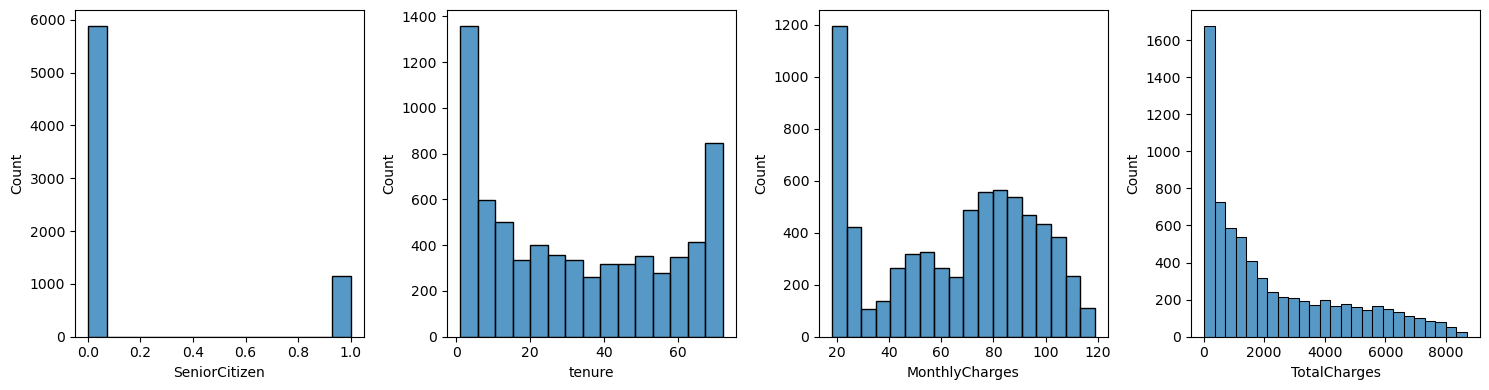

In [16]:
plt.figure(figsize=(15,4))
for i in range(len(col_num)):
    plt.subplot(1,4,i+1)
    sns.histplot(data=df_clean, x=col_num[i])
    plt.tight_layout()

### Multivariate Analysis

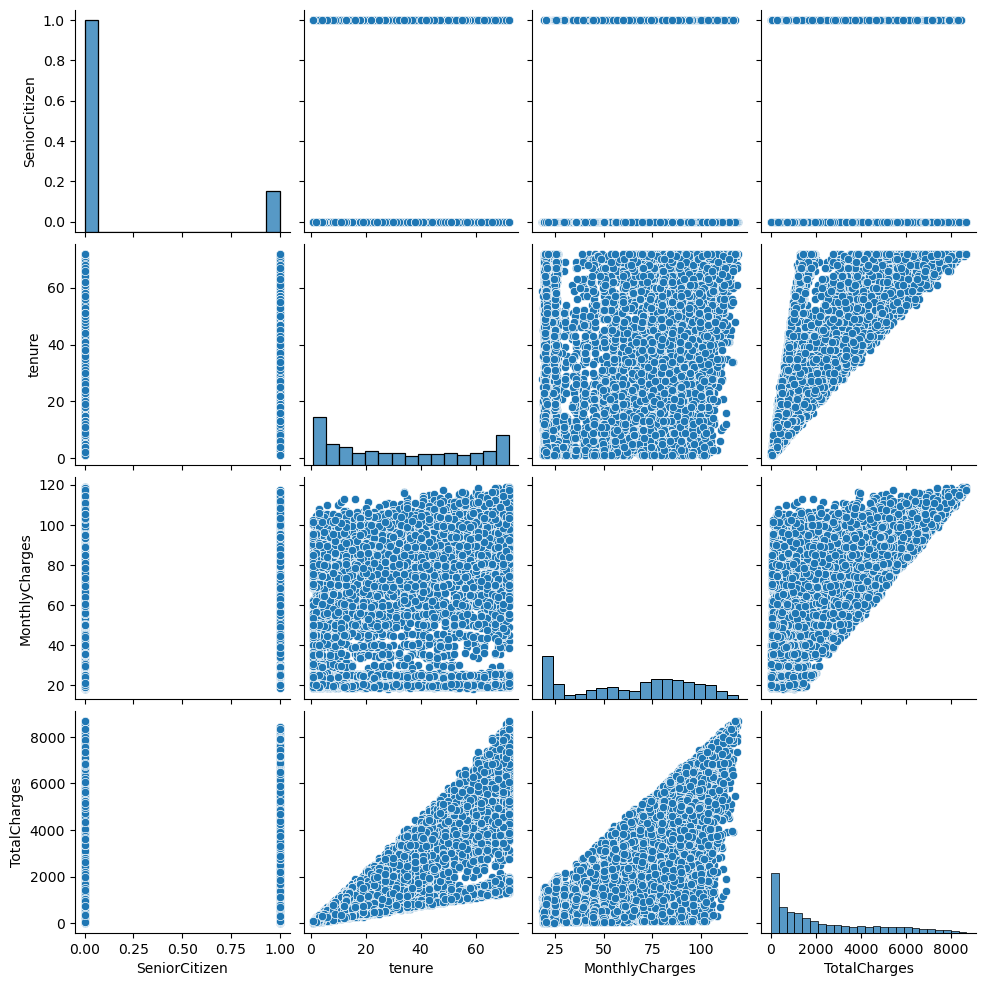

In [17]:
sns.pairplot(data=df_clean[col_num])

<Axes: >

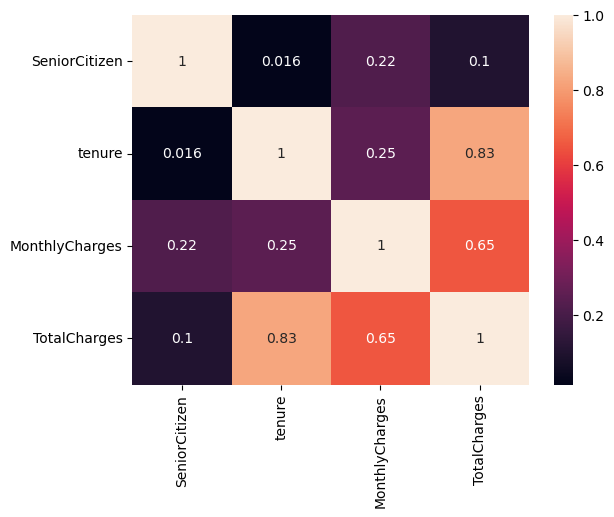

In [18]:
sns.heatmap(data=df_clean[col_num].corr(), annot=True)

## Addition Data Preparation Before Modeling

### Feature Engineering

#### Feature Selection

In [19]:
df_clean = df_clean.drop(columns=['customerID'])

#### Feature Creation

In [20]:
df_clean["TotalCharges_per_tenure"] = df_clean["TotalCharges"] / df_clean["tenure"]

In [21]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   gender                   7032 non-null   object 
 1   SeniorCitizen            7032 non-null   int64  
 2   Partner                  7032 non-null   object 
 3   Dependents               7032 non-null   object 
 4   tenure                   7032 non-null   int64  
 5   PhoneService             7032 non-null   object 
 6   MultipleLines            7032 non-null   object 
 7   InternetService          7032 non-null   object 
 8   OnlineSecurity           7032 non-null   object 
 9   OnlineBackup             7032 non-null   object 
 10  DeviceProtection         7032 non-null   object 
 11  TechSupport              7032 non-null   object 
 12  StreamingTV              7032 non-null   object 
 13  StreamingMovies          7032 non-null   object 
 14  Contract                 7032

### One Hot Encoding

In [22]:
df_obj = df_clean.select_dtypes('object')
col_obj = df_obj.columns.tolist()
col_obj.remove('Churn')
col_obj

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [23]:
df_final = pd.get_dummies(data=df_clean, columns=col_obj)

In [24]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 47 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7032 non-null   int64  
 1   tenure                                   7032 non-null   int64  
 2   MonthlyCharges                           7032 non-null   float64
 3   TotalCharges                             7032 non-null   float64
 4   Churn                                    7032 non-null   object 
 5   TotalCharges_per_tenure                  7032 non-null   float64
 6   gender_Female                            7032 non-null   bool   
 7   gender_Male                              7032 non-null   bool   
 8   Partner_No                               7032 non-null   bool   
 9   Partner_Yes                              7032 non-null   bool   
 10  Dependents_No                            7032 non-nul

### Train Test Split

In [25]:
X = df_final.drop(columns=['Churn'])
y = df_final['Churn'].map({"No" : 0, "Yes" : 1})

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [27]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4922, 46)
(2110, 46)
(4922,)
(2110,)


## Modeling

### Decision Tree

In [28]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

### Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

### Hyperparameter Tuning

In [32]:
params = {
    "max_depth" : [2,3,4,5,7,10,15],
    "min_samples_leaf" : [10,15,25,50,100]
}

In [33]:
from sklearn.model_selection import GridSearchCV

In [34]:
grid_search = GridSearchCV(estimator=RandomForestClassifier(), 
                           param_grid=params,
                           cv=10,
                           scoring='roc_auc')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5, 7, 10, 15],
                         'min_samples_leaf': [10, 15, 25, 50, 100]},
             scoring='roc_auc')

In [35]:
rf_best = grid_search.best_estimator_
rf_best.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=10)

## Evaluation

#### Recall

In [36]:
from sklearn.metrics import recall_score

y_dtree = dtree.predict(X_test)
y_rf = rf.predict(X_test)
y_rf_best = rf_best.predict(X_test)

In [37]:
print("=== RECALL SCORE ===")
print(f"dtree\t: {recall_score(y_true=y_test, y_pred=y_dtree, pos_label=1, average='binary')}")
print(f"rf\t: {recall_score(y_true=y_test, y_pred=y_rf, pos_label=1, average='binary')}")
print(f"rf_best\t: {recall_score(y_true=y_test, y_pred=y_rf_best, pos_label=1, average='binary')}")

=== RECALL SCORE ===
dtree	: 0.4846846846846847
rf	: 0.4990990990990991
rf_best	: 0.4846846846846847


#### Precision

In [38]:
from sklearn.metrics import precision_score

print("=== PRECISION SCORE ===")
print(f"dtree\t: {precision_score(y_true=y_test, y_pred=y_dtree, pos_label=1, average='binary')}")
print(f"rf\t: {precision_score(y_true=y_test, y_pred=y_rf, pos_label=1, average='binary')}")
print(f"rf_best\t: {precision_score(y_true=y_test, y_pred=y_rf_best, pos_label=1, average='binary')}")

=== PRECISION SCORE ===
dtree	: 0.4846846846846847
rf	: 0.6266968325791855
rf_best	: 0.6560975609756098


#### AUC

In [39]:
from sklearn.metrics import roc_auc_score

y_proba_dtree = dtree.predict_proba(X_test)[:,1]
y_proba_rf = rf.predict_proba(X_test)[:,1]
y_proba_rf_best = rf_best.predict_proba(X_test)[:,1]

In [40]:
print("=== ROC AUC ===")
print(f"dtree\t: {roc_auc_score(y_true=y_test, y_score=y_proba_dtree)}")
print(f"rf\t: {roc_auc_score(y_true=y_test, y_score=y_proba_rf)}")
print(f"rf_best\t: {roc_auc_score(y_true=y_test, y_score=y_proba_rf_best)}")

=== ROC AUC ===
dtree	: 0.6506190434807798
rf	: 0.8193094058688913
rf_best	: 0.8461504591408128


## Model Performance Summary

| Model | Recall | Precision | ROC-AUC |
|------|--------|-----------|---------|
| Decision Tree | 0.48 | 0.48 | 0.65 |
| Random Forest | **0.50** | 0.63 | 0.82 |
| Random Forest (Tuned) | 0.48 | **0.66** | **0.85** |


## Model Selection Rationale
The **Random Forest model** is selected as the final model for business evaluation due to the following reasons:

- It achieves the **highest recall**, capturing more actual churn customers.
- It significantly improves **precision** compared to Decision Tree, reducing unnecessary retention costs.
- It shows strong **ROC-AUC performance**, indicating reliable class separation and flexibility for threshold optimization.
- The model is robust and more suitable for real-world deployment.

> In churn prediction, the most valuable model is not the one with the highest accuracy, but the one that best balances **churn detection and cost efficiency**.

## Business Impact Simulation – Random Forest Model

To quantify the business value of the churn prediction model, a cost and revenue simulation is conducted based on the following assumptions.

### Assumptions
- Total customers: **100**
- Total churn customers: **20**
- Non-churn customers: **80**
- Retention cost per customer: **50K**
- Revenue per retained customer: **100K**
- Selected model: **Random Forest**
- Model performance:
  - **Recall = 50%**
  - **Precision = 63%**
  - **ROC-AUC = 0.82**

## Baseline Condition (Before Model)

In the baseline scenario, retention incentives are provided to **all customers**, without using any prediction model.

### Retention Cost
$$
100 \times 50K = 5{,}000K
$$

### Revenue
$$
80 \times 100K = 8{,}000K
$$

## Model-Based Condition (After Model)

Retention incentives are provided **only to customers predicted as churn** by the Random Forest model.

### Retention Cost Analysis (Precision-Based)

Precision determines how many targeted customers are actually churn.

$$
\text{Predicted Churn Customers} = \frac{20}{0.63} \approx 32
$$

$$
\text{Total Retention Cost} = 32 \times 50K = 1{,}600K
$$

**Interpretation:**  
Higher precision reduces unnecessary incentives given to non-churn customers, leading to significant cost savings.

### Revenue Recovery Analysis (Recall-Based)

Recall measures how many actual churn customers are successfully detected and retained.

$$
\text{Recovered Churn Customers} = 0.50 \times 20 = 10
$$

$$
\text{Total Retained Customers} = 80 + 10 = 90
$$

$$
\text{Recovered Revenue} = 90 \times 100K = 9{,}000K
$$

**Interpretation:**  
Higher recall directly increases revenue by preventing customer churn.

## Key Business Insights

- **Precision controls retention cost efficiency**
- **Recall drives revenue recovery**
- **ROC-AUC enables flexible threshold tuning for different business strategies**

> Cost is prediction-based, while revenue is reality-based.

## Final Business Conclusion

By applying the **Random Forest churn prediction model**, the company can achieve meaningful business impact:

- Retention costs reduced from **5,000K → 1,600K**
- Revenue increased from **8,000K → 9,000K**
- More effective and targeted retention strategy

This analysis demonstrates that **business-aligned evaluation metrics (recall, precision, and ROC-AUC)** are more important than accuracy alone when assessing churn prediction models.